You are given two data sets

Historical Daily Oil Prices: RWTCD.xls
3 Month Treasury Bill: 3MO.CSV

 

For the period 12/31/2019 - 12/31/2020:

A. Please compute Daily Excess Return levels based on comparisons to risk free (3Mo T-bill).

B. Please compute the Log Cumulative Excess Return over the same period.

 

Please use any approach programmatic or manual but make sure to document your approach and a method for us to run and evaluate your submission. You are not restricted by the use of tools and are NOT bound to use the data we provided. We do not expect that you will need financial data subscriptions to solve this problem but do feel free to reach out to us if you run into any questions along the way.

 

Submitting

Please submit a public GitHub url if you are submitting code otherwise use the link below to upload your submission. 

Please submit here:
https://app3.greenhouse.io/tests/f8d6f4975c0dbc3b29d4965269462a3e?utm_medium=email&utm_source=TakeHomeTest

In [1]:
## set up enviorment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# initiate df to work with
t_bill = pd.read_csv('3MO.csv', header = 0, names = ['date','rf'])

# specify sheet name and strating row to retrive the correct data, make column names easier to work with
oil_prices = pd.read_excel('RWTCd.xls', sheet_name = 'Data 1', header = 2, names = ['date', 'price']) ## 

# Preprocessing the treasury bill data frame

In [2]:
# check data types to make sure we have the correct thing to work with
# in this case, both columns of the treasury bill df require further exploration
t_bill.dtypes

date    object
rf      object
dtype: object

In [3]:
## check to see if the rf column needs some cleaning as well, in this case we found some '.' entires
t_bill['rf'].describe()

count     1263
unique     216
top          .
freq        53
Name: rf, dtype: object

In [4]:
## change the data type of the date column to datetime
t_bill['date'] = pd.to_datetime(t_bill['date'])

## change non numeric values ('.'s) to NA
t_bill['rf'] = pd.to_numeric(t_bill['rf'], errors='coerce')

# use foward fill to fill the NAs caused by the '.' 
# becauase it best practice to use the closing price of the previous trading day if the data is missing
t_bill['rf'] = t_bill['rf'].fillna(method = 'ffill')

# check if there are any NAs left
t_bill['rf'].isna().value_counts()

False    1263
Name: rf, dtype: int64

In [5]:
#selecting the time period to use
mask = (t_bill['date'] >= '2019-12-31') & (t_bill['date'] <= '2020-12-31')
df_tbill = t_bill[mask]
df_tbill

,date,rf
872,2019-12-31,1.52
873,2020-01-01,1.52
874,2020-01-02,1.51
875,2020-01-03,1.49
876,2020-01-06,1.53
...,...,...
1129,2020-12-25,0.09
1130,2020-12-28,0.11
1131,2020-12-29,0.10
1132,2020-12-30,0.08


In [6]:
len(df_tbill['date'].unique())

262

# Preprocessing the oil price data frame

In [7]:
# check data types to make sure we have the correct thing to work with
oil_prices.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [8]:
# creating new column to calculate return
oil_prices['shift_1'] = oil_prices['price'].shift(1)

# calculating the return
oil_prices['ret'] = ( oil_prices['price'] - oil_prices['shift_1'] ) / oil_prices['shift_1']


#selecting the time period to use
mask_2 = (oil_prices['date'] >= '2019-12-31') & (oil_prices['date'] <= '2020-12-31')
df_oil = oil_prices[mask_2]
df_oil

,date,price,shift_1,ret
8568,2019-12-31,61.14,61.66,-0.008433
8569,2020-01-02,61.17,61.14,0.000491
8570,2020-01-03,63.00,61.17,0.029917
8571,2020-01-06,63.27,63.00,0.004286
8572,2020-01-07,62.70,63.27,-0.009009
...,...,...,...,...
8816,2020-12-24,48.18,47.94,0.005006
8817,2020-12-28,47.50,48.18,-0.014114
8818,2020-12-29,47.85,47.50,0.007368
8819,2020-12-30,48.24,47.85,0.008150


In [9]:
len(df_oil['date'].unique())

253

# Merging the two df together and calculating the excess return and the log cumulative excess return

C:\Users\yinwn\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


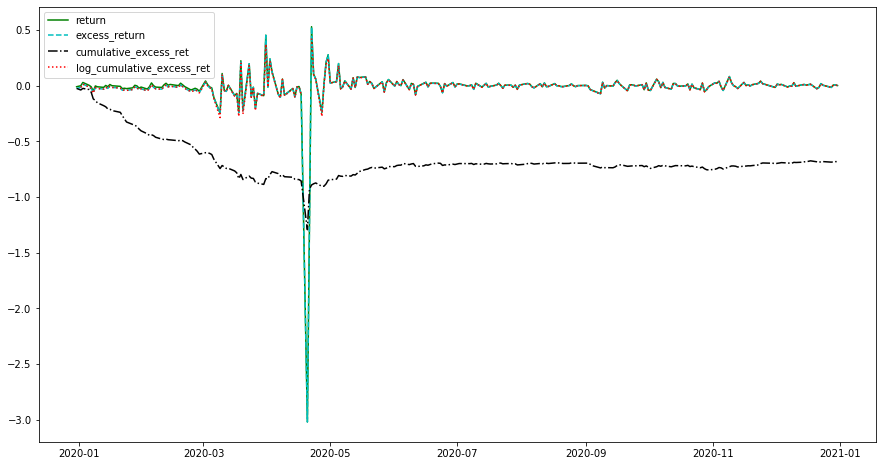

In [10]:
# merging the two df on the date column
df_all = df_tbill.merge(df_oil, left_on='date', right_on='date')

# converting the unit of the rf rates
df_all['rf'] = df_all['rf'] / 100

# calculateing the excess return of oil to rf
df_all['excess_ret'] = df_all['ret'] - df_all['rf']


# calculating the cumulative excess return and the log cumulative excess return
df_all['cumulative_excess_ret'] = (df_all['excess_ret'] + 1).cumprod() - 1
df_all['log_cumulative_excess_return'] = np.log(df_all['cumulative_excess_ret'] + 1).diff()

# writing the outputing csv file
df_all.to_csv('Nai_Wang_LIT_Interview_assignment.csv')


##plotting
plt.figure(figsize=(15,8))
plt.plot(df_all['date'], df_all['ret'], '-g', label='return')  # solid green
plt.plot(df_all['date'], df_all['excess_ret'], '--c', label='excess_return') # dashed cyan
plt.plot(df_all['date'], df_all['cumulative_excess_ret'], '-.k', label='cumulative_excess_ret') # dashdot black
plt.plot(df_all['date'], df_all['log_cumulative_excess_return'], ':r', label='log_cumulative_excess_ret');  # dotted red
plt.legend()